In [1]:
# imports stolen from Rony
# Essentials
import datetime
import requests
import json
import pandas as pd
import numpy as np
import re
import warnings

# Math
import scipy as sc
import statsmodels.api as sm
from scipy import stats


# SKLearn
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
"""
Use DF from saved CSV:
"""
biden = pd.read_csv('biden_data.csv')
trump = pd.read_csv('data.csv')
trump['keyword'] = 'Trump'
biden['keyword'] = 'Biden'
data = [trump, biden]

df = pd.concat(data)
df = df.reset_index()
df = df.drop(['index','Unnamed: 0'], axis=1)
df['date'] = pd.to_datetime(df['date'])
df = df.loc[df['subreddit'] != 'csci040temp']

In [5]:
# explicitly pro-Trump
trump_subs = ['AskTrumpSupporters','donaldtrump','trump']
df_trump = df[df['subreddit'].isin(trump_subs)]
# not explicitly pro-Trump, but right
right_subs = ['Conservative','Libertarian']
df_right = df[df['subreddit'].isin(right_subs)]

In [6]:
# pd.DataFrame(df10.groupby(["subreddit"])["compound"].describe())

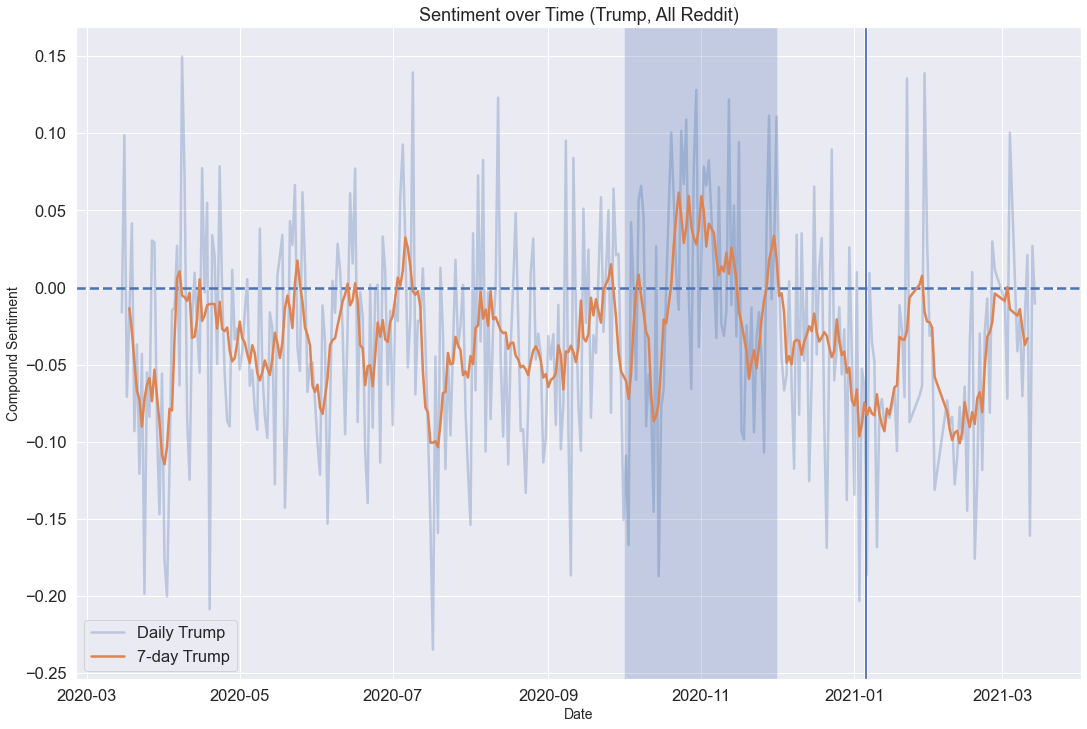

In [18]:
"""
plotting Trump sentiment in reddit comments over time

"""

df_trump = df.loc[df['keyword'] == 'Trump']
plot_data = pd.DataFrame(df_trump.groupby(["date"])["compound"].mean())
plot_data = plot_data.reset_index()
plot_data['7day'] = plot_data['compound'].rolling(7).mean().shift(-3)

# set figure size
plt.figure(figsize=(18,12))
# time series 
p = sns.lineplot(x="date", y="compound", label="Daily Trump", data=plot_data, alpha=0.3)

ax = p.axes
ax.axhline(0, ls='--')
ax.axvspan('2020-10', '2020-12', alpha=0.25)
ax.axvspan('2021-01-05', '2021-01-06', alpha=0.9)
# 7-day rolling average
sns.lineplot(x="date",y="7day", label="7-day Trump", data=plot_data)


# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Compound Sentiment", size=14)
plt.title('Sentiment over Time (Trump, All Reddit)');

In [8]:
"""
Finding the most prevalant subreddits in the Trump subset

"""
top = df_trump.subreddit.value_counts().index[0:30]
top_trump = df_trump.loc[df['subreddit'].isin(top)]

# Using describe/groupby to investigate sentiment towards Trump
# in each of the most prevalent subreddits
# pd.DataFrame(top_trump.groupby(["subreddit"])["compound"].describe())

# subs with the most consistent positive sentiment
trump_subs = ['AskTrumpSupporters','trump','donaldtrump']
# subs with the most consistent negative sentiment
anti_trump = ['Coronavirus','SelfAwarewolves','changemyview']

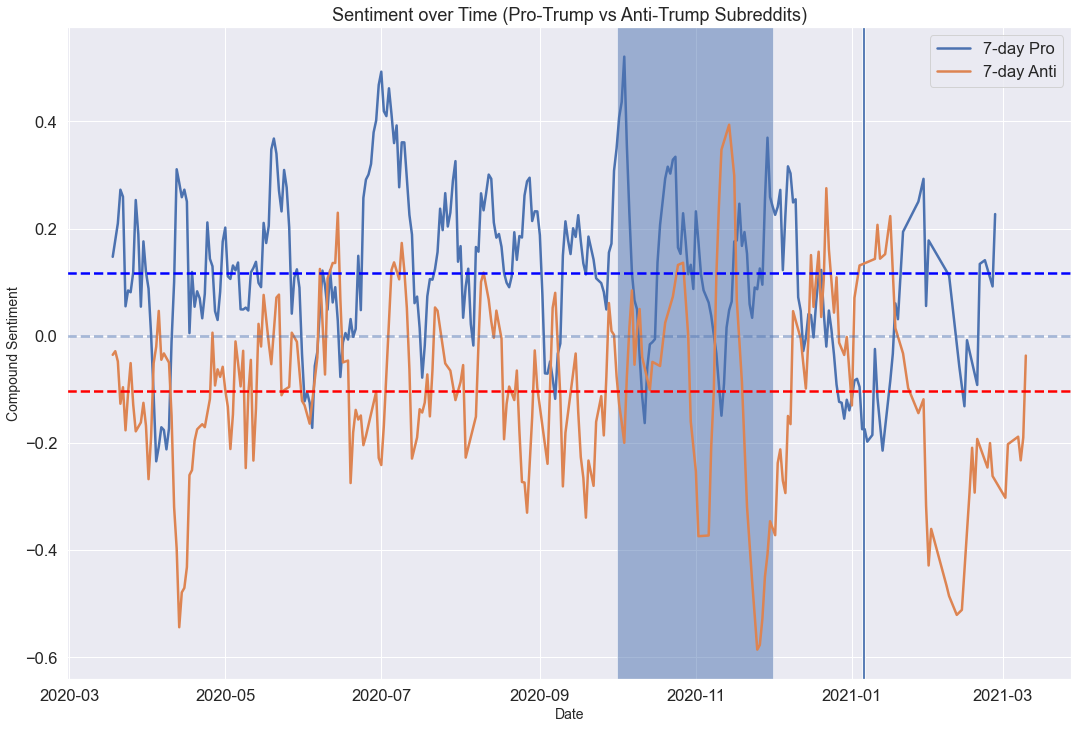

In [34]:
"""
Trump sentiment over time on Pro vs Anti Trump subs

"""
# df_trump = df.loc[df['keyword'] == 'Trump']
pro_trump = df_trump.loc[df['subreddit'].isin(trump_subs)]
con_trump = df_trump.loc[df['subreddit'].isin(anti_trump)]

pro_data = pd.DataFrame(pro_trump.groupby(["date"])["compound"].mean())
pro_data = pro_data.reset_index()
pro_data['7day'] = pro_data['compound'].rolling(7).mean().shift(-3)

con_data = pd.DataFrame(con_trump.groupby(["date"])["compound"].mean())
con_data = con_data.reset_index()
con_data['7day'] = con_data['compound'].rolling(7).mean().shift(-3)

# set figure size
plt.figure(figsize=(18,12))
# time series 
p = sns.lineplot(x="date",y="7day", label="7-day Pro", data=pro_data)
sns.lineplot(x="date",y="7day", label="7-day Anti", data=con_data)

pro_mean = pro_data['7day'].mean()
con_mean = con_data['7day'].mean()

ax = p.axes
ax.axhline(0, ls='--', alpha=0.5)
ax.axhline(pro_mean, ls='--', c='blue')
ax.axhline(con_mean, ls='--', c='red')
ax.axvspan('2020-10', '2020-12', alpha=0.5)
ax.axvspan('2021-01-05', '2021-01-06', alpha=0.9)
# 7-day rolling average

# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Compound Sentiment", size=14)
plt.title('Sentiment over Time (Pro-Trump vs Anti-Trump Subreddits)');

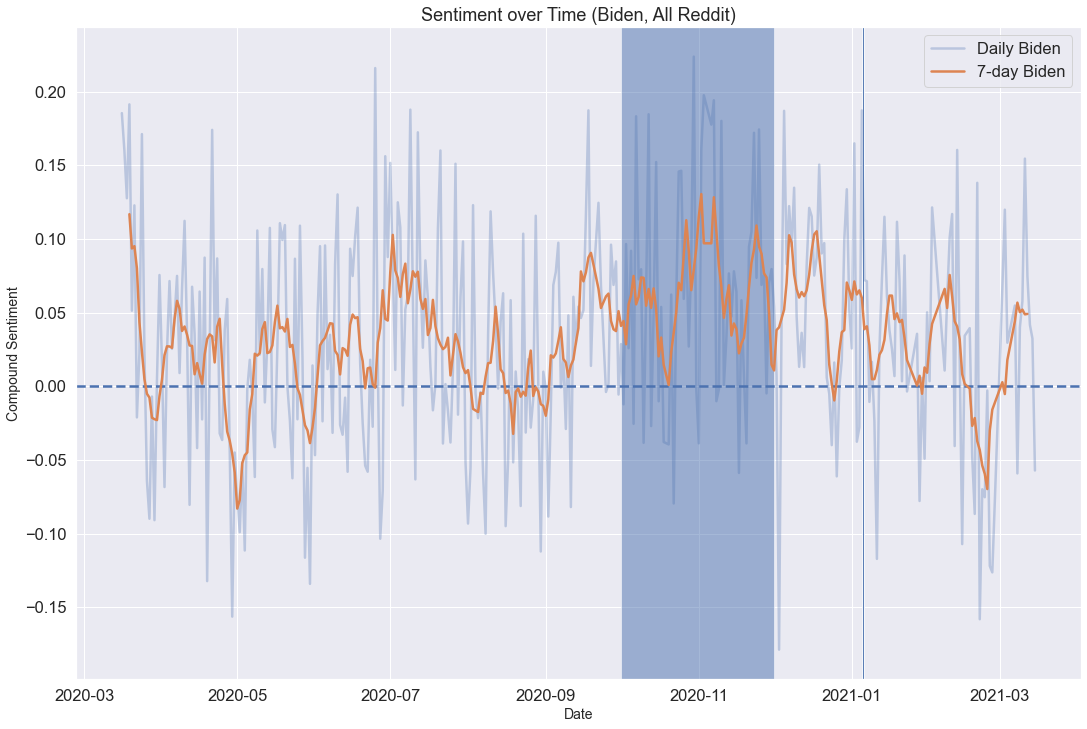

In [35]:
"""
plotting Trump sentiment in reddit comments over time

"""

df_biden = df.loc[df['keyword'] == 'Biden']

plot_data = pd.DataFrame(df_biden.groupby(["date"])["compound"].mean())
plot_data = plot_data.reset_index()
plot_data['7day'] = plot_data['compound'].rolling(7).mean().shift(-3)

# set figure size
plt.figure(figsize=(18,12))
# time series 
p = sns.lineplot(x="date", y="compound", label="Daily Biden", data=plot_data, alpha=0.3)

ax = p.axes
ax.axhline(0, ls='--')
ax.axvspan('2020-10', '2020-12', alpha=0.5)
ax.axvspan('2021-01-05', '2021-01-06', alpha=0.9)
# 7-day rolling average
sns.lineplot(x="date",y="7day", label="7-day Biden", data=plot_data)

# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Compound Sentiment", size=14)
plt.title('Sentiment over Time (Biden, All Reddit)');

In [36]:
"""
Looking for an explaination for the Biden spike in late October.
Result: csci040temp subreddit spikes the sentiment with 74 posts
"""

# df_biden2 = df_biden.loc[(df_biden['date'] == '2020-10-26')]
# # pd.DataFrame(df_biden.groupby(["date"])["compound"].mean())
# # df_biden2 = df_biden2.loc[df_biden2['compound']> 0.4]
# pd.DataFrame(df_biden2.groupby(["subreddit"])["compound"].describe())

'\nLooking for an explaination for the spike in late October.\nResult: csci040temp subreddit spikes the sentiment with 74 posts\n'

In [ ]:
"""
Repeated process for id'ing pro/anti subreddits for Biden

In the process found a subreddit of comp sci student bots which
has now been excluded at the top of the notebook:

# df = df.loc[df['subreddit'] != 'csci040temp']
"""

# subs with the most consistent positive sentiment
biden_subs = ['AskALiberal','VoteDEM','JoeBiden']
# subs with the most consistent negative sentiment
anti_biden = ['PublicFreakout','trump','conspiracy']

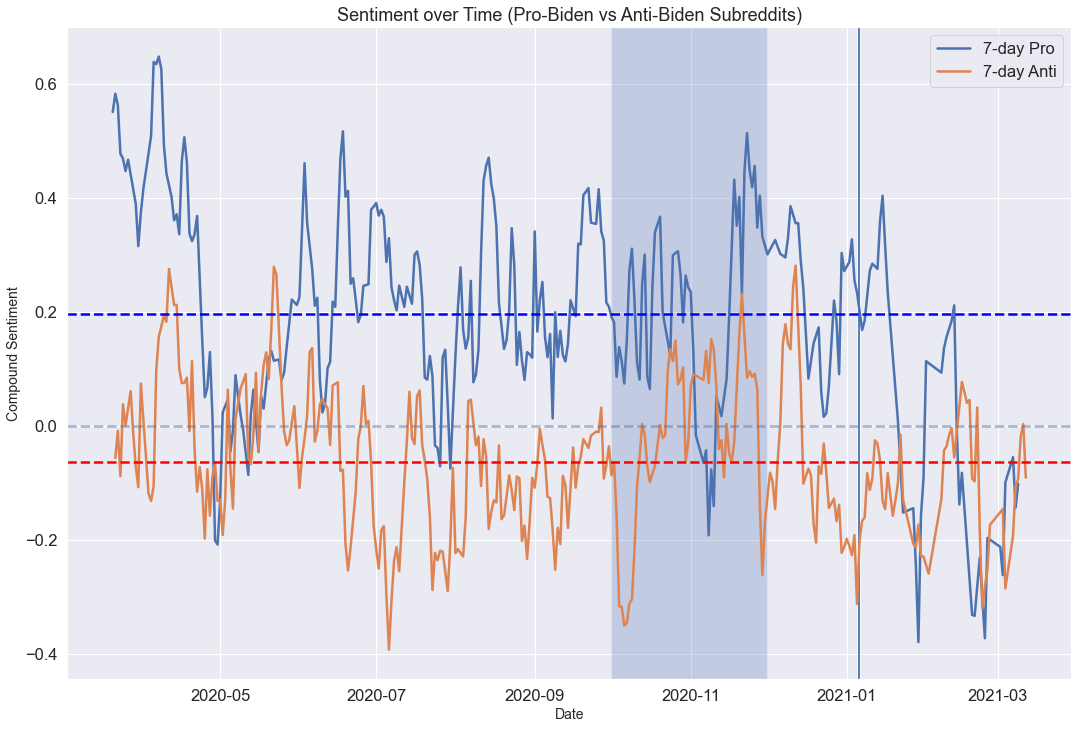

In [29]:
pro_biden = df_biden.loc[df['subreddit'].isin(biden_subs)]
con_biden = df_biden.loc[df['subreddit'].isin(anti_biden)]
# plotting Trump sentiment over time
# df_trump = df.loc[df['keyword'] == 'Trump']
pro_data = pd.DataFrame(pro_biden.groupby(["date"])["compound"].mean())
pro_data = pro_data.reset_index()
pro_data['7day'] = pro_data['compound'].rolling(7).mean().shift(-3)
pro_mean = pro_data['7day'].mean()

con_data = pd.DataFrame(con_biden.groupby(["date"])["compound"].mean())
con_data = con_data.reset_index()
con_data['7day'] = con_data['compound'].rolling(7).mean().shift(-3)
con_mean = con_data['7day'].mean()

# set figure size
plt.figure(figsize=(18,12))
# time series 
p = sns.lineplot(x="date",y="7day", label="7-day Pro", data=pro_data)
sns.lineplot(x="date",y="7day", label="7-day Anti", data=con_data)

ax = p.axes
ax.axhline(0, ls='--', alpha=0.5)
ax.axhline(pro_mean, ls='--', c='blue')
ax.axhline(con_mean, ls='--', c='red')
ax.axvspan('2020-10', '2020-12', alpha=0.25)
ax.axvspan('2021-01-05', '2021-01-06', alpha=0.9)
# 7-day rolling average


# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Compound Sentiment", size=14)
plt.title('Sentiment over Time (Pro-Biden vs Anti-Biden Subreddits)');

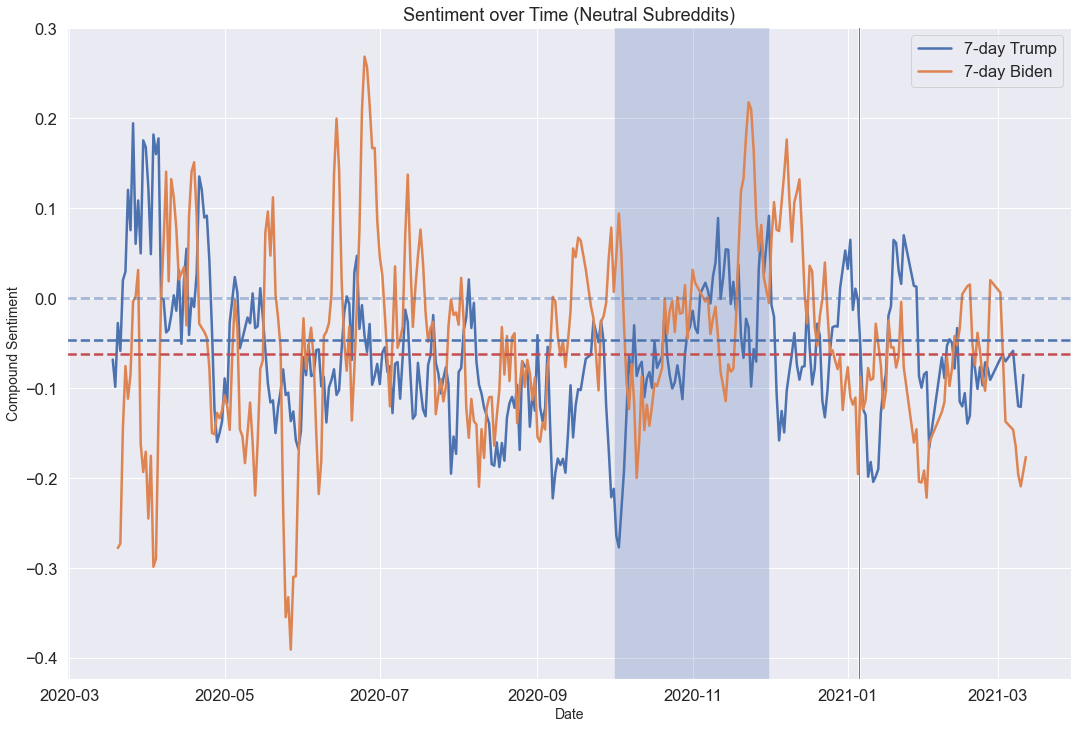

In [41]:
top = df.subreddit.value_counts().index[0:30]
top_df = df.loc[df['subreddit'].isin(top)]
# pd.DataFrame(top_df.groupby(["subreddit",'keyword'])["compound"].describe())

# subreddits with consistently balanced sentiment for both keywords
neut = ['LeopardsAteMyFace','PoliticalHumor','conspiracy','PublicFreakout','facepalm','news']

neut_biden = df_biden.loc[df['subreddit'].isin(neut)]
neut_trump = df_trump.loc[df['subreddit'].isin(neut)]
# plotting Trump sentiment over time
# df_trump = df.loc[df['keyword'] == 'Trump']
trump_data = pd.DataFrame(neut_trump.groupby(["date"])["compound"].mean())
trump_data = trump_data.reset_index()
trump_data['7day'] = trump_data['compound'].rolling(7).mean().shift(-3)

biden_data = pd.DataFrame(neut_biden.groupby(["date"])["compound"].mean())
biden_data = biden_data.reset_index()
biden_data['7day'] = biden_data['compound'].rolling(7).mean().shift(-3)

# set figure size
plt.figure(figsize=(18,12))
# time series 
p = sns.lineplot(x="date",y="7day", label="7-day Trump", data=trump_data)
sns.lineplot(x="date",y="7day", label="7-day Biden", data=biden_data)

biden_mean = biden_data['7day'].mean()
trump_mean = trump_data['7day'].mean()

ax = p.axes
ax.axhline(0, ls='--', alpha=0.5)
ax.axhline(biden_mean, ls='--', alpha=1, c='b')
ax.axhline(trump_mean, ls='--', alpha=1, c='r')
ax.axvspan('2020-10', '2020-12', alpha=0.25)
ax.axvspan('2021-01-05', '2021-01-06', alpha=0.9)
# 7-day rolling average


# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Compound Sentiment", size=14)
plt.title('Sentiment over Time (Neutral Subreddits)');

In [24]:
"""
1-sample t-test for election period vs entire period (Trump)
"""

trump_test = pd.DataFrame(df.loc[df['keyword'] == 'Trump'].groupby(["date"])["compound"].mean())
trump_test = trump_test.reset_index()

pop_mean = trump_test['compound'].mean()
sample = trump_test.loc[(trump_test['date'] > '2020-10') & (trump_test['date'] < '2020-12')]
result = stats.ttest_1samp(sample['compound'], pop_mean)

result.statistic, result.pvalue

(2.9978115106417196, 0.00402373023845634)

In [25]:
"""
1-sample t-test for election period vs entire period (Biden)
"""

biden_test = pd.DataFrame(df.loc[df['keyword'] == 'Biden'].groupby(["date"])["compound"].mean())
biden_test = biden_test.reset_index()

pop_mean = biden_test['compound'].mean()
sample = biden_test.loc[(biden_test['date'] > '2020-10') & (biden_test['date'] < '2020-12')]
result = stats.ttest_1samp(sample['compound'], pop_mean)

result.statistic, result.pvalue

(3.0906853815766495, 0.0031088143423465184)

In [43]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 7), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 20})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Extracting tf features for LDA...


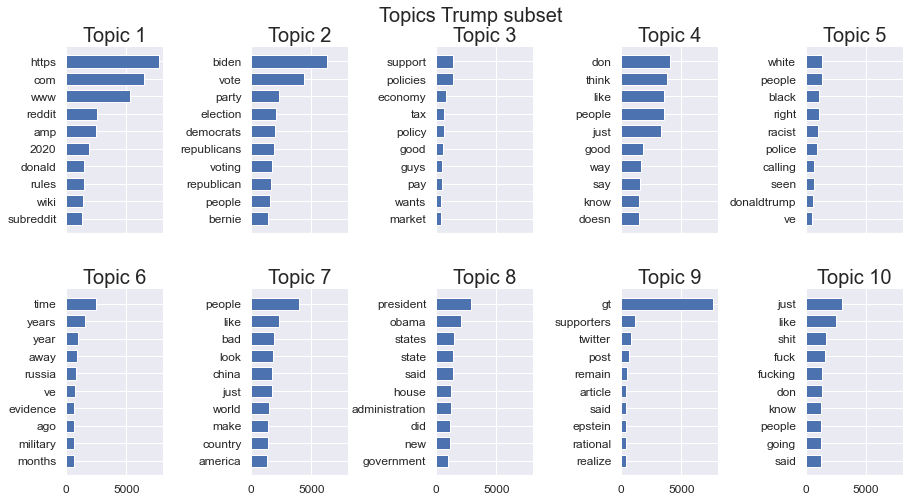

In [44]:
n_features = 1000
n_components = 10
n_top_words = 10

data_samples = df_trump['body']

print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data_samples)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics Trump subset')

Extracting tf features for LDA...


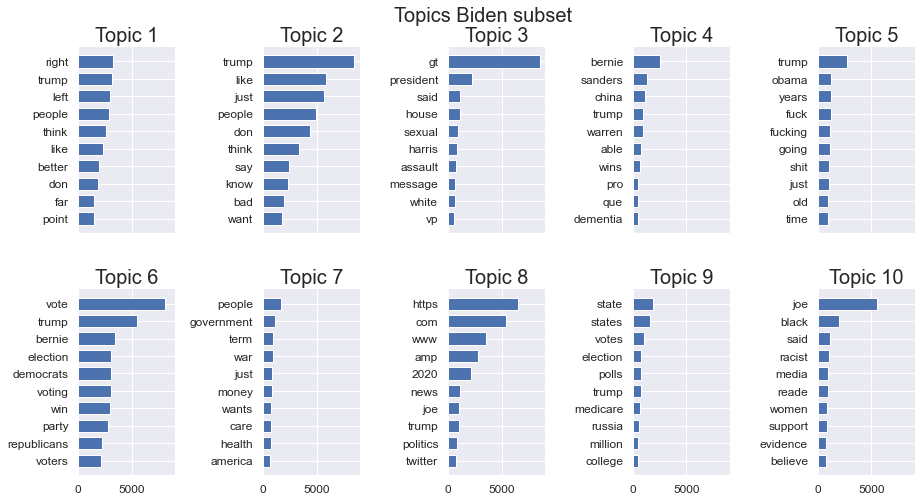

In [45]:
n_features = 1000
n_components = 10
n_top_words = 10

data_samples = df_biden['body']

print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data_samples)

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics Biden subset')